In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv"
df=pd.read_csv(url,parse_dates=["Date"],index_col="Date")

In [3]:
df

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [4]:
series=pd.read_csv(url,header=0,index_col=0)

<Axes: xlabel='Date'>

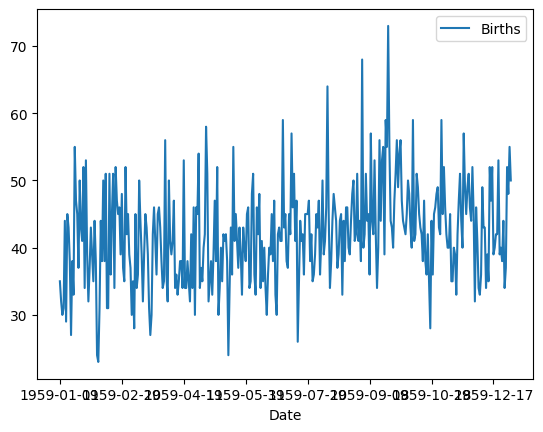

In [5]:
series.plot()

In [6]:
xaxis=np.linspace(0,12,num=200)
seasonality=1.2*np.sin(2*np.pi*xaxis/4)

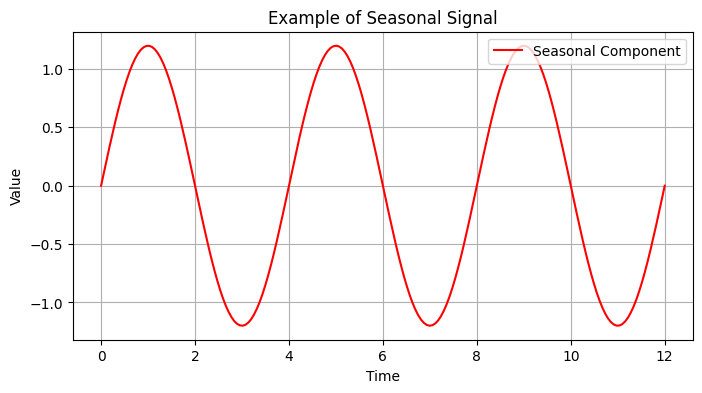

In [7]:
plt.figure(figsize=(8,4))
plt.plot(xaxis,seasonality,label="Seasonal Component",color="red")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Example of Seasonal Signal")
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

In [8]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"

In [9]:
data=pd.read_csv(url,parse_dates=['Date'],index_col="Date")

In [10]:
data.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


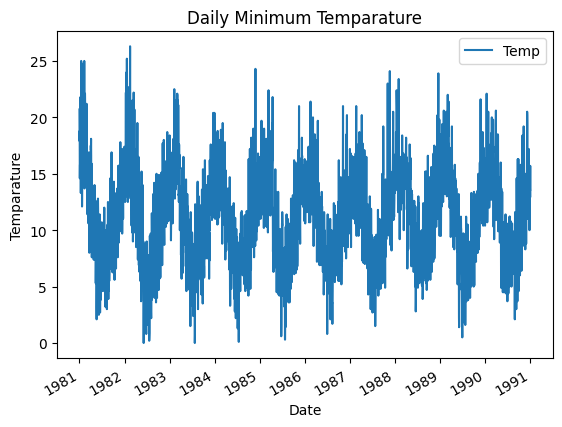

In [11]:
data.plot(title="Daily Minimum Temparature")
plt.xlabel("Date")
plt.ylabel("Temparature")
plt.show()

In [12]:
from statsmodels.tsa.stattools import kpss

In [13]:
def kpsstest(series):
  statistic,pvalue,nlags,criticalvalues=kpss(series)
  print(f"KPPSS STATISTIC: {statistic}")
  print(f"P VALUE: {pvalue}")
  print(f"NUMBER OF LAGS: {nlags}")
  print("CRITICAL VALUES:")
  for key,value in criticalvalues.items():
    print(f"{key} : {value}")
  print(f'Result:The Series is {"not" if pvalue<0.05 else "" } stationary')
kpsstest(data['Temp'])

KPPSS STATISTIC: 0.05570612670427435
P VALUE: 0.1
NUMBER OF LAGS: 36
CRITICAL VALUES:
10% : 0.347
5% : 0.463
2.5% : 0.574
1% : 0.739
Result:The Series is  stationary


<ipython-input-13-dd9a9950cad6>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic,pvalue,nlags,criticalvalues=kpss(series)


In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
decomposition=seasonal_decompose(data['Temp'],model='additive',period=365)

In [16]:
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

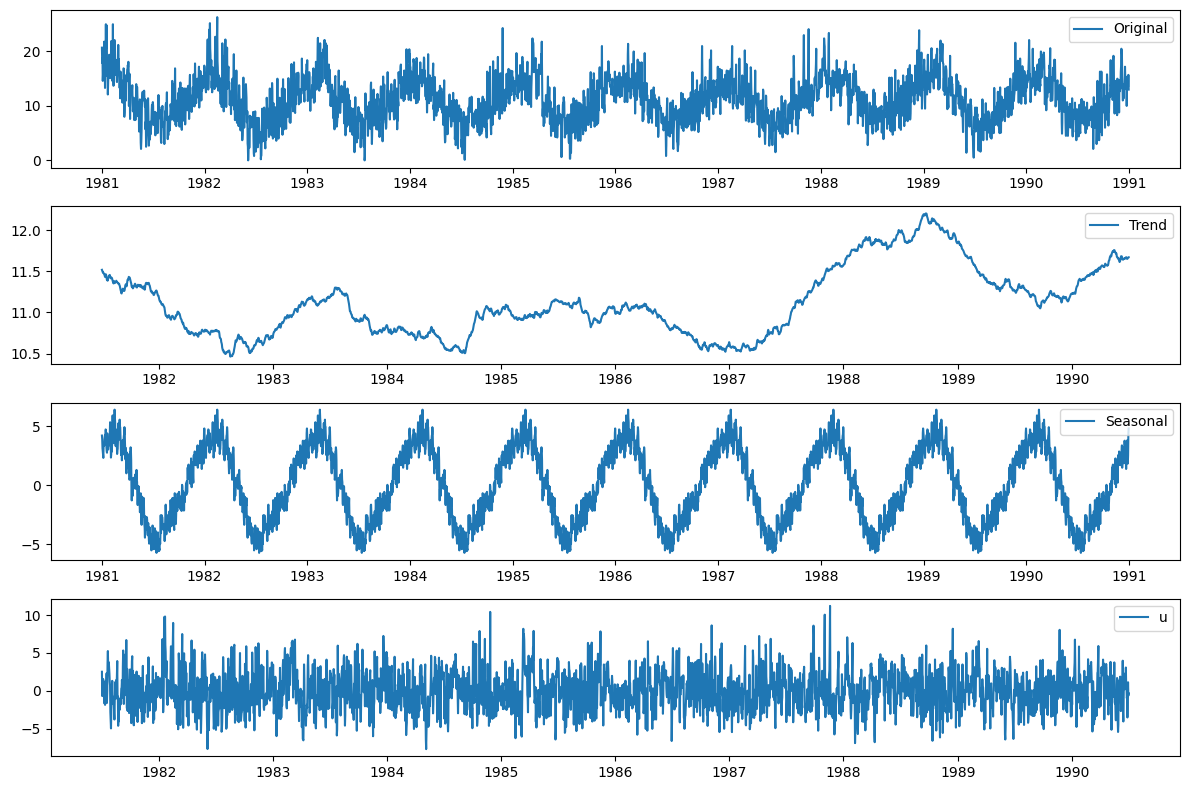

In [17]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(data['Temp'],label="Original")
plt.legend(loc='upper right')
plt.subplot(412)
plt.plot(trend,label="Trend")
plt.legend(loc="upper right")
plt.subplot(413)
plt.plot(seasonal,label="Seasonal")
plt.legend(loc="upper right")
plt.subplot(414)
plt.plot(residual,label="Residual")
plt.legend("upper right")
plt.tight_layout()
plt.show()